# **Breast Cancer Classification with a simple Neural Network (NN)**
### __Uses:__ Neuronal Network

*__Made by:__ Sebastián Cervantes ^^*

## **Work flow:**
 * Data
 * Data pre-processing
 * Train Test Split
 * NN
 * Evaluation

### __Importing dependencies__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

### __Data Collection & Processing__

In [3]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [4]:
# printing the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [6]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [7]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [9]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

### 1-> Benign

### 2-> Malignat

In [11]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### __Train Test Split__

In [12]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


### __Standarize the data__

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### __Building the Neural Network__

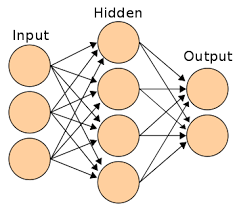

In [17]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [19]:
# setting up the layers of my Neural Network
model = keras.Sequential([
                        keras.layers.Flatten(input_shape =(30,)),    # input
                        keras.layers.Dense(20, activation='relu'),   # hidden
                        keras.layers.Dense(2, activation='sigmoid')  # output
])

## __*the number of neurons in your INPUT layer is equal to the number of featuers that you have in the data set*__

## __*the number of neurons in your OUTPUT layer is equal to the number of target in your data set (0 and 1 are in this case so it should be 2 neurons)*__

In [20]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# training the Meural Network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 16ms/step - loss: 0.9144 - accuracy: 0.4719 - val_loss: 0.6345 - val_accuracy: 0.6522
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6040 - accuracy: 0.6748 - val_loss: 0.3876 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4151 - accuracy: 0.8191 - val_loss: 0.2646 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.8729 - val_loss: 0.2068 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2522 - accuracy: 0.9046 - val_loss: 0.1757 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2130 - accuracy: 0.9242 - val_loss: 0.1568 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1866 - accuracy: 0.9291 - val_loss: 0.1436 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

### __Visualizing accuracy and loss__

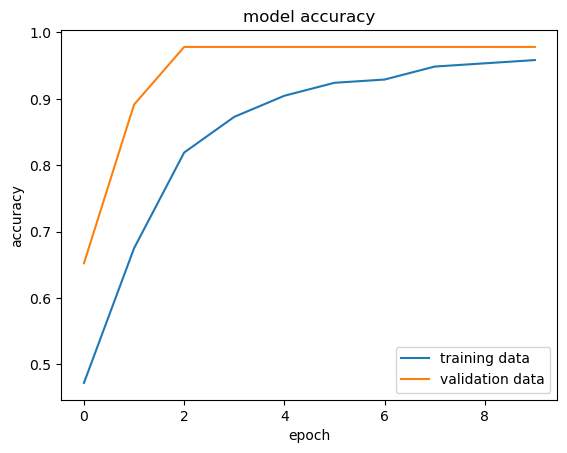

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

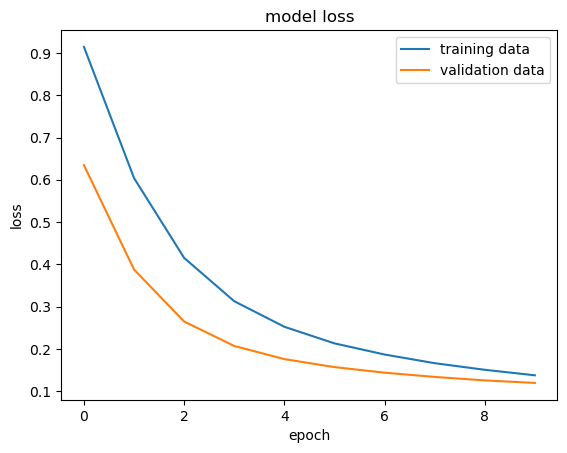

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

### __Evaluation__

In [24]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.9737
0.9736841917037964


In [25]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [26]:
Y_pred = model.predict(X_test_std) #model.predict() gives the prediction probability of each class for that data point

4/4 [==============================] - 0s 1ms/step


In [27]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.68238103 0.6630014 ]


In [28]:
print(Y_pred)

[[6.8238103e-01 6.6300142e-01]
 [6.1853081e-01 7.3933113e-01]
 [1.9512109e-01 9.7598010e-01]
 [9.8713034e-01 3.8310696e-04]
 [5.3573030e-01 5.9713191e-01]
 [9.5113963e-01 2.1190882e-02]
 [3.8221082e-01 8.1616157e-01]
 [5.7819825e-01 9.8556101e-01]
 [4.1355190e-01 9.4726384e-01]
 [6.0154152e-01 9.4895250e-01]
 [6.6749549e-01 6.5091449e-01]
 [3.2095665e-01 8.6510175e-01]
 [5.0903338e-01 6.8451953e-01]
 [5.0139815e-01 8.1237978e-01]
 [3.6234552e-01 9.6068925e-01]
 [9.0217090e-01 9.4739959e-02]
 [2.8489599e-01 9.5148128e-01]
 [2.3504555e-01 8.9016467e-01]
 [4.9544680e-01 9.4667995e-01]
 [8.4031504e-01 3.0706657e-02]
 [6.6412985e-01 9.4173324e-01]
 [2.8135154e-01 9.5163518e-01]
 [2.4118263e-01 9.1657889e-01]
 [5.7552302e-01 9.8149395e-01]
 [6.5560734e-01 7.6761836e-01]
 [8.4438616e-01 7.3701374e-02]
 [4.3896592e-01 8.8001418e-01]
 [5.9668756e-01 7.4989921e-01]
 [9.3424511e-01 7.6264501e-02]
 [9.0745968e-01 1.1141496e-01]
 [6.6789937e-01 9.3970138e-01]
 [4.3384245e-01 9.3153435e-01]
 [4.1514

In [32]:
#  argmax function
my_list = [0.75, 0.25]
index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.75, 0.25]
0


In [33]:
# converting the prediction probability to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


### __Aplication example__

In [31]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)
# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) #neural network only works with one dimensional elements
# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)
prediction_label = [np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0] == 0):
  print('The tumor is Malignant')
else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 16ms/step
[[0.35343516 0.9694597 ]]
[1]
The tumor is Benign


C:\Users\sebas.DESKTOP-NH7K1UT\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
